In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Edge effects

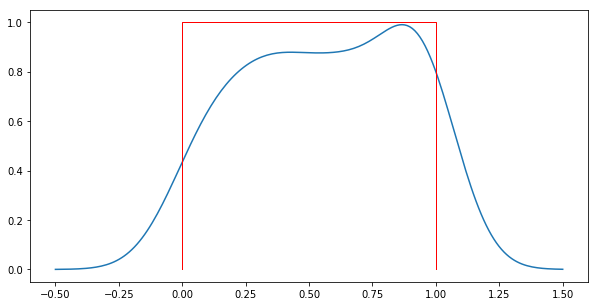

In [2]:
pts = np.random.random(50)

ker = scipy.stats.kde.gaussian_kde(pts)

fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(-0.5, 1.5, 200)
ax.plot(x, ker(x))
ax.plot([0,0,1,1], [0,1,1,0], color="red", linewidth=1)

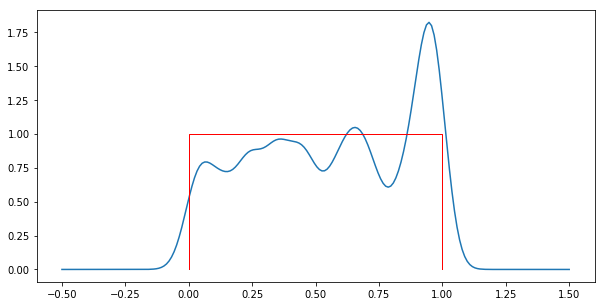

In [3]:
def make_kernel(pts, bw):
    def ker(x):
        x = np.atleast_1d(x)
        y = np.mean(np.exp(-(x[:,None]-pts[None,:])**2/(2*bw*bw)), axis=1)
        return y / (bw * np.sqrt(2*np.pi))
    return ker

ker = make_kernel(pts, 0.05)
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(-0.5, 1.5, 200)
ax.plot(x, ker(x))
ax.plot([0,0,1,1], [0,1,1,0], color="red", linewidth=1)

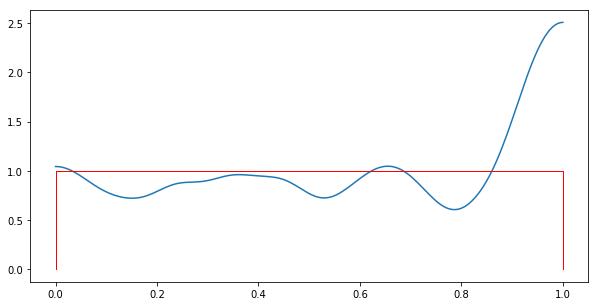

In [4]:
def unit_interval_kernel(pts, bw):
    ker = make_kernel(pts, bw)
    def kernel(t):
        t = np.asarray(t)
        return ker(t) + ker(-t) + ker(2-t)
    return kernel

ker = unit_interval_kernel(pts, 0.05)
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0, 1, 200)
ax.plot(x, ker(x))
ax.plot([0,0,1,1], [0,1,1,0], color="red", linewidth=1)

In [5]:
np.sum(ker(x)) * (1/200)

1.0038728881527563

## One sided

In [6]:
pts = np.random.exponential(1, 50)

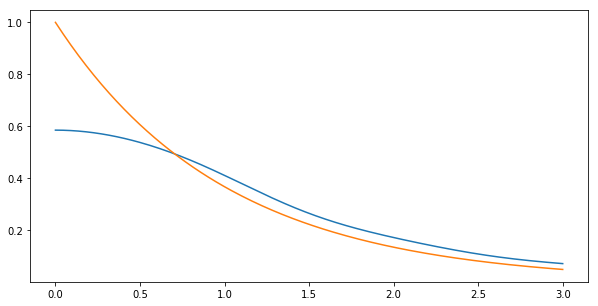

In [7]:
k = scipy.stats.kde.gaussian_kde(pts)
def ker(t):
    return k(t) + k(-t)

fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0, 3, 200)
ax.plot(x, ker(x))
ax.plot(x, np.exp(-x))

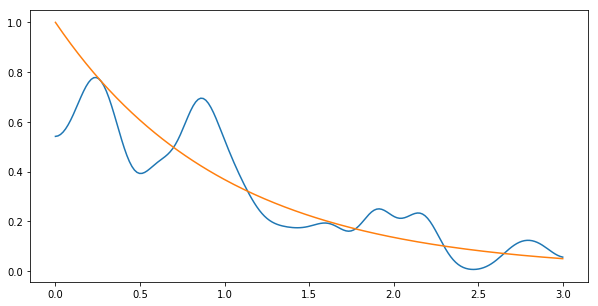

In [8]:
k = make_kernel(pts, 0.1)
def ker(t):
    return k(t) + k(-t)

fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0, 3, 200)
ax.plot(x, ker(x))
ax.plot(x, np.exp(-x))

## Via a log transformation

0.999995184871
1.0
1.0
0.999999999838
0.99849781021
0.650997512711


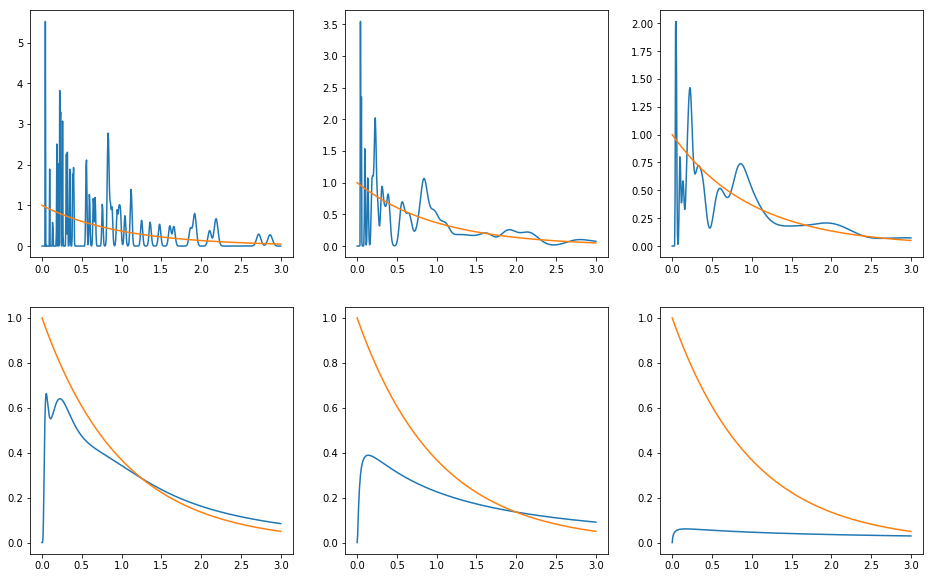

In [9]:
def make_logged(pts, bw):
    def k(x):
        y = np.mean(np.exp(-(np.log(pts[:,None]) - np.log(x[None,:]))**2/(2*bw*bw)) / pts[:,None], axis=0)
        return y * np.exp(-bw*bw/2) / np.sqrt(2*np.pi*bw*bw)
    return k

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

x = np.linspace(0.0001, 3, 500)
for bw, ax in zip([0.01, 0.05, 0.1, 0.5, 1, 2], axes.flat):
    ker = make_logged(pts, bw)
    ax.plot(x, ker(x))
    xx = np.linspace(0.0001, 100, 100000)
    print(np.sum(ker(xx)) * (xx[1]-xx[0]))
    ax.plot(x, np.exp(-x))

## Cheat and use exponential

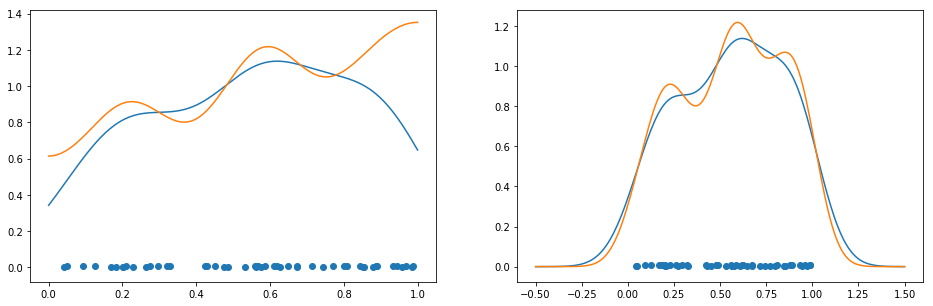

In [10]:
upts = 1 - np.exp(-pts)

fig, axes = plt.subplots(ncols=2, figsize=(16,5))

ax = axes[0]
ker = scipy.stats.kde.gaussian_kde(upts)
x = np.linspace(0, 1, 200)
ax.plot(x, ker(x))
ker = unit_interval_kernel(upts, 0.1)
ax.plot(x, ker(x))
ax.scatter(upts, np.random.random(len(upts))*.01)

ax = axes[1]
ker = scipy.stats.kde.gaussian_kde(upts)
x = np.linspace(-0.5, 1.5, 200)
ax.plot(x, ker(x))
ker = make_kernel(upts, 0.1)
ax.plot(x, ker(x))
ax.scatter(upts, np.random.random(len(upts))*.01)

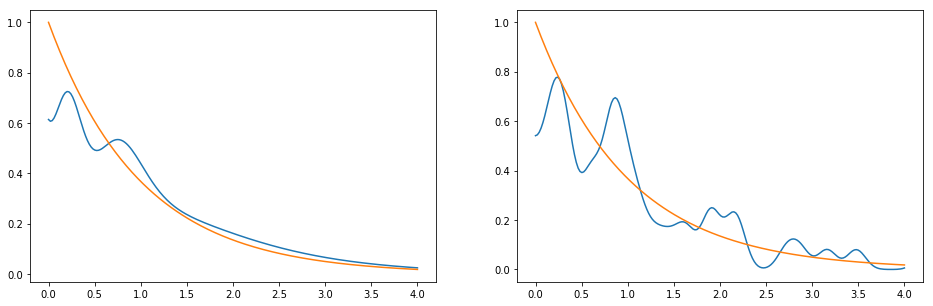

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(16,5))

ax = axes[0]
x = np.linspace(0, 4, 200)
y = np.exp(-x)
ker = unit_interval_kernel(upts, 0.1)
ax.plot(x, ker(1-y)*y)
ax.plot(x, np.exp(-x))

ax = axes[1]
mainker = make_kernel(pts, 0.1)
ax.plot(x, mainker(x)+mainker(-x))
ax.plot(x, np.exp(-x))